<div class="alert alert-success" role="alert">
    <p style = 'text-align:center; font-size:250%; font-weight: bold'>Artificial Neural Network 2</p><br>
    <p style = 'text-align:center; font-size:150%; font-weight: 700'>Author: Andrean Yonathan</p>
</div>

# Latihan (1)

### Melakukan import library yang dibutuhkan

In [1]:
# import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

# import library for build model 
from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

# import library untuk data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Load Dataset

In [2]:
#Panggil file (load file bernama Stock.csv) dan simpan dalam dataframe
dataset ="Stock.csv"
data = pd.read_csv(dataset)

In [3]:
# tampilkan 5 baris data 
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,56.45,56.66,55.46,56.53,3716500,UTX
1,2006-01-04,56.80,56.80,55.84,56.19,3114500,UTX
2,2006-01-05,56.30,56.49,55.63,55.98,3118900,UTX
3,2006-01-06,56.45,56.67,56.10,56.16,2874300,UTX
4,2006-01-09,56.37,56.90,56.16,56.80,2467200,UTX


### Review Data

In [4]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3020 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3020 non-null   float64
 3   Low     3020 non-null   float64
 4   Close   3020 non-null   float64
 5   Volume  3020 non-null   int64  
 6   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.3+ KB


In [5]:
# Kolom 'low' yang akan kita gunakan dalam membangun model
# Slice kolom 'low' 

Low_data = data.iloc[:,3:4].values

In [6]:
# cek output low_data
Low_data

array([[ 55.46],
       [ 55.84],
       [ 55.63],
       ...,
       [126.92],
       [127.29],
       [127.57]])

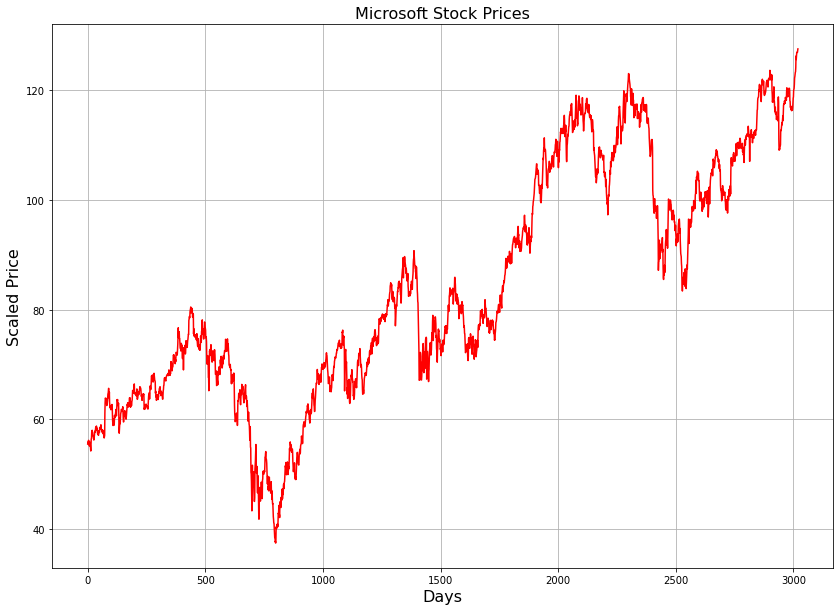

In [7]:
# Visualizing low_data

plt.figure(figsize=(14,10))                 
plt.plot(Low_data,c="red")
plt.title("Microsoft Stock Prices",fontsize=16)
plt.xlabel("Days",fontsize=16)
plt.ylabel("Scaled Price",fontsize=16)
plt.grid()
plt.show()

# Latihan (2)

###  Data Preprocessing

In [8]:
# Menskalakan data antara 1 dan 0 (scaling) pada low data

scaler = MinMaxScaler(feature_range=(0,1))           
Low_scaled = scaler.fit_transform(Low_data)

In [9]:
# definisikan variabel step dan train 

step_size = 21                      

x_train = []
y_train = []

In [10]:
# membuat fitur dan lists label

for i in range(step_size,3019):
    x_train.append(Low_scaled[i-step_size:i,0])
    y_train.append(Low_scaled[i,0])

In [11]:
# mengonversi list yang telah dibuat sebelumnya ke array

x_train = np.array(x_train)                   
y_train = np.array(y_train)

In [12]:
# cek dimensi data dengan function .shape

x_train.shape                               

(2998, 21)

In [13]:
# 498 hari terakhir akan digunakan dalam pengujian
# 2500 hari pertama akan digunakan dalam pelatihan

x_test = x_train[2500:]
x_train = x_train[:2500]
y_test = y_train[2500:]
y_train = y_train[:2500]

In [14]:
# reshape data untuk dimasukkan kedalam Keras model

x_train = np.reshape(x_train, (2500, step_size, 1))
x_test = np.reshape(x_test, (498, step_size, 1))

In [15]:
# cek kembali dimensi data yang telah di reshape dengan function .shape

print(x_train.shape)
print(x_test.shape)                             

(2500, 21, 1)
(498, 21, 1)


# Latihan (3)

###  Build Model - RNN

In [16]:
# buat varibel penampung model RNN
rnn_model = Sequential()

In [17]:
# Output dari SimpleRNN akan menjadi bentuk tensor 2D (batch_size, 40) dengan Dropout sebesar 0.15

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(x_train.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.15))

# Add a Dense layer with 1 units.
rnn_model.add(Dense(1))

In [18]:
# menambahkan loss function kedalam model RNN dengan tipe MSE

rnn_model.compile(optimizer="adam",loss="MSE")

In [19]:
# fit the model RNN, dengan epoch 20 dan batch size 25

rnn_model.fit(x_train,y_train,epochs=20,batch_size=25)

Epoch 1/20
100/100 [==============================] - 11s 26ms/step - loss: 0.1512
Epoch 2/20
100/100 [==============================] - 2s 25ms/step - loss: 0.0472: 
Epoch 3/20
100/100 [==============================] - 2s 25ms/step - loss: 0.0282
Epoch 4/20
100/100 [==============================] - 3s 27ms/step - loss: 0.0195
Epoch 5/20
100/100 [==============================] - 2s 25ms/step - loss: 0.0146
Epoch 6/20
100/100 [==============================] - 2s 22ms/step - loss: 0.0124: 0s - loss: 0.012
Epoch 7/20
100/100 [==============================] - 2s 23ms/step - loss: 0.0103
Epoch 8/20
100/100 [==============================] - 3s 29ms/step - loss: 0.0088: 0s - loss: 0
Epoch 9/20
100/100 [==============================] - 4s 44ms/step - loss: 0.0074
Epoch 10/20
100/100 [==============================] - 3s 29ms/step - loss: 0.0069
Epoch 11/20
100/100 [==============================] - 4s 42ms/step - loss: 0.0059
Epoch 12/20
100/100 [==============================] - 3s 34m

In [20]:
# Prediksi Model RNN
rnn_predictions = rnn_model.predict(x_test)

rnn_score = r2_score(y_test,rnn_predictions)

In [21]:
rnn_score

0.9816370615907863

# Latihan (4)

###  Build Model - LSTM

In [22]:
# buat varibel penampung model LSTM
lstm_model = Sequential()

In [23]:
# Add a LSTM layer with 40 internal units. dengan Dropout sebesar 0.15

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(x_train.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

# Add a Dense layer with 1 units.
lstm_model.add(Dense(1))

In [24]:
# menambahkan loss function kedalam model lstm dengan tipe MSE

lstm_model.compile(optimizer="adam",loss="MSE")

In [25]:
# fit lstm model, dengan epoch 20 dan batch size 25

lstm_model.fit(x_train,y_train,epochs=20,batch_size=25)

Epoch 1/20
100/100 [==============================] - 18s 43ms/step - loss: 0.0169
Epoch 2/20
100/100 [==============================] - 4s 42ms/step - loss: 0.0034
Epoch 3/20
100/100 [==============================] - 4s 44ms/step - loss: 0.0031
Epoch 4/20
100/100 [==============================] - 6s 59ms/step - loss: 0.0028
Epoch 5/20
100/100 [==============================] - 7s 66ms/step - loss: 0.0026
Epoch 6/20
100/100 [==============================] - 6s 56ms/step - loss: 0.0026
Epoch 7/20
100/100 [==============================] - 5s 51ms/step - loss: 0.0026
Epoch 8/20
100/100 [==============================] - 5s 46ms/step - loss: 0.0023: 0s -
Epoch 9/20
100/100 [==============================] - 4s 43ms/step - loss: 0.0023
Epoch 10/20
100/100 [==============================] - 4s 36ms/step - loss: 0.0021
Epoch 11/20
100/100 [==============================] - 4s 35ms/step - loss: 0.0022
Epoch 12/20
100/100 [==============================] - 4s 38ms/step - loss: 0.0021: 
Epoc

In [26]:
# Prediksi Model LSTM
lstm_predictions = lstm_model.predict(x_test)

lstm_score = r2_score(y_test,lstm_predictions)

In [27]:
lstm_score

0.951694221215096

# Latihan (5)

### Evaluation

In [28]:
# Cetak nilai prediksi masing-masing model dengan menggunakan r^2 square

print("R^2 Score of RNN:",rnn_score)
print("R^2 Score of LSTM:",lstm_score)

R^2 Score of RNN: 0.9816370615907863
R^2 Score of LSTM: 0.951694221215096


### Visualisasi Perbandingan Hasil Model prediksi dengan data original 

In [29]:
lstm_predictions = scaler.inverse_transform(lstm_predictions)
rnn_predictions = scaler.inverse_transform(rnn_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

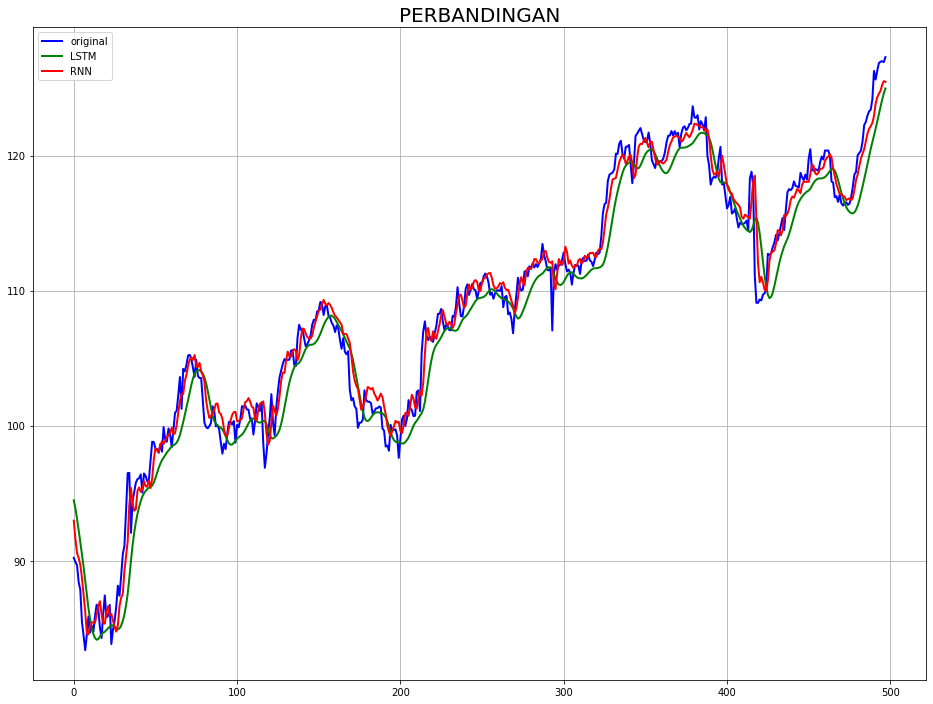

In [30]:
plt.figure(figsize=(16,12))

plt.plot(y_test, c="blue",linewidth=2, label="original")
plt.plot(lstm_predictions, c="green",linewidth=2, label="LSTM")
plt.plot(rnn_predictions, c="red",linewidth=2, label="RNN")
plt.legend()
plt.title("PERBANDINGAN",fontsize=20)
plt.grid()
plt.show()

## Berikan Kesimpulan Anda!

Berdasarkan nilai R-squared dari kedua model dan juga grafik yang ada, dapat disimpulkan bahwa model RNN lebih baik digunakan untuk kasus prediksi harga saham.